In [1]:
%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
#plot settings
pd.set_option('display.mpl_style', 'default') 
plt.rcParams['figure.figsize'] = (15, 5) # ratio 3:2 plot size

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

#Importing the Events data

In [3]:
events = pd.read_csv('events_clean.csv', header=0)
events = events.set_index('event_hashtag') #setting the event hashtag or name as index
type(events.index)

pandas.core.index.Index

In [4]:
events['incident_date'] = pd.to_datetime(events['incident_date'])
#events['precise_time'] = pd.to_datetime(events['precise_time'])
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, Bus hits delivery truck on SLEx, 2 hurt | Inquirer News to #dumptruckguagua
Data columns (total 11 columns):
associated_articles    299 non-null object
coverage_frequency     299 non-null int64
incident_date          299 non-null datetime64[ns]
injured_number         193 non-null float64
injured_specific       177 non-null object
killed_number          133 non-null float64
killed_specific        119 non-null object
location               276 non-null object
number_of_vehicles     276 non-null float64
time                   190 non-null object
vehicle_types          278 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 28.0+ KB


In [5]:
labels = ['date', 'articles','coverage_frequency','event_name','injured','injured_desc','killed','killed_desc','location',
         'vehicle_number','precise_time','hour','ambiguous_time','vehicle_types']

In [6]:
events.head()

,associated_articles,coverage_frequency,incident_date,injured_number,injured_specific,killed_number,killed_specific,location,number_of_vehicles,time,vehicle_types
event_hashtag,,,,,,,,,,,
"Bus hits delivery truck on SLEx, 2 hurt | Inquirer News",1377,1,2014-01-02,2,ridergroup: truck driver / ridergroup: truck h...,NaN,NaN,"Laguna, San Pedro, Silangan Exit, SLEX",2,7:20 AM,"bus, delivery truck"
Bus accident disrupts Commonwealth Ave. traffic on 1st workday of 2014 | News | GMA News Online,1149,1,2014-01-02,NaN,NaN,NaN,NaN,"NCR, Quezon City, Commonwealth Avenue",1,Early Morning,bus
Motorcycle rider dies in EDSA mishap,1165,1,2014-01-04,NaN,NaN,1,name: Ryan Ragas; age: 29; profession: securit...,"Metro Manila, Mandaluyong, EDSA",2,5:40 AM,motorcycle
2 killed in Pangasinan road accident | Inquirer News,361,1,2014-01-06,NaN,NaN,2,name: Joseph Quiban; age: 32; gender: male; ri...,"Pangasinan, Urdaneta, National Highway, Barang...",2,4:00 AM,"motorcycle, bus"
"Customs officer killed, 2 hurt in QC road mishap",2263,1,2014-01-08,2,ridergroup: taxi driver / ridergroup: passenger /,1,name: Alfonso Mallari; age: 73; gender: male; ...,"NCR, Quezon City, Commonwealth Avenue",5,Morning,"car, taxi, Asian Utility Vehicle FX, pickup truck"


In [7]:
events.vehicle_types = events.vehicle_types.str.replace("\]","")
events.vehicle_types = events.vehicle_types.str.replace("\[","")
events.vehicle_types = events.vehicle_types.str.replace("'","")
events.location = events.location.str.replace("\]","")
events.location = events.location.str.replace("\[","")
events.location = events.location.str.replace("\'","")
events.time = events.time.str.replace("\]","")
events.time = events.time.str.replace("\[","")
events.time = events.time.str.replace("'","")
events.injured_specific = events.injured_specific.str.replace("set\(\[","")
events.injured_specific = events.injured_specific.str.replace("\]\)","")
events.killed_specific = events.killed_specific.str.replace("set\(\[","")
events.killed_specific = events.killed_specific.str.replace("\]\)","")


In [8]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, Bus hits delivery truck on SLEx, 2 hurt | Inquirer News to #dumptruckguagua
Data columns (total 11 columns):
associated_articles    299 non-null object
coverage_frequency     299 non-null int64
incident_date          299 non-null datetime64[ns]
injured_number         193 non-null float64
injured_specific       177 non-null object
killed_number          133 non-null float64
killed_specific        119 non-null object
location               276 non-null object
number_of_vehicles     276 non-null float64
time                   190 non-null object
vehicle_types          278 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 28.0+ KB


###Topline figures

There were 299 unique events covered.

In [9]:
len(events) # Total Number of Unique Events


299

#At what time of day do most incidents happen?

###Most reported incidents happen in the morning, peaking before dawn. This is consistent with real-life data from MMDA.

Specific times were reported for about half the events.

In [10]:
#this function takes the "general" times out of the precise times list and puts them in a separate series. stuff like
#morning, noon etc.

def extract_ambiguous(models):
    clean_list= []
    for model in models:
        if ":" not in model:
            clean_list.append(model.lower())
        elif "noon" in model:
            None
        elif len(model) < 1:
            None
    return clean_list

In [11]:
# converts the time strings on precise_time to type timestamps when applicable
# if it's a NaN, converts to a NaT
# if it's a string, leaves it as type str
def convert_datetime(event):
    return pd.to_datetime(event)

In [12]:
events.time = events.time.apply(convert_datetime)
events.time.head()
# the dates are all wrong because by default, the function took today's date

event_hashtag
Bus hits delivery truck on SLEx, 2 hurt | Inquirer News         2015-07-09 07:20:00
Bus accident disrupts Commonwealth Ave. traffic on 1st workday of 2014 | News | GMA News Online          Early Morning
Motorcycle rider dies in EDSA mishap                            2015-07-09 05:40:00
2 killed in Pangasinan road accident | Inquirer News            2015-07-09 04:00:00
Customs officer killed, 2 hurt in QC road mishap                            Morning
Name: time, dtype: object

In [13]:
# filter out all the strings and all the nulls

#events.precise_time.filter(regex='^[a-zA-Z]')
time_idx = pd.DataFrame(events.time).applymap(np.isreal)
# NB lost about 90 events
time_only = events.time.iloc[np.where(time_idx.time == True)]
stamp_only = time_only.iloc[np.where(time_only.notnull())[0]]

In [14]:
# series with only rows that have relevant times
stamp_only

event_hashtag
Bus hits delivery truck on SLEx, 2 hurt | Inquirer News        2015-07-09 07:20:00
Motorcycle rider dies in EDSA mishap                           2015-07-09 05:40:00
2 killed in Pangasinan road accident | Inquirer News           2015-07-09 04:00:00
1 dead, 7 hurt in CamSur road accident | Inquirer News         2015-07-09 18:45:00
Motorcycle rider killed in Pasig hit-and-run accident          2015-07-09 23:00:00
Killer Highway latest victim: QC govt worker | Inquirer News   2015-07-09 16:00:00
3 hurt in Skyway accident in Magallanes                        2015-07-09 13:00:00
Wayward truck leaves 1 dead, 4 injured in Laguna | Inquirer News   2015-07-09 07:30:00
Man dies after getting hit by motorcycle in Pasay              2015-07-09 06:00:00
13 hurt in bus, truck collision on NLEX in Bulacan | Inquirer News   2015-07-09 05:45:00
31 elite cops hurt in Sarangani road accident  police official | News | GMA News Online   2015-07-09 02:50:00
6 hurt as trailer truck rams jeepney

In [15]:
df_t = pd.DataFrame(stamp_only)
df_t['precise_hour'] = df_t['time']
del df_t['time']

e1 = events.join(df_t, how='left')

In [16]:
def convert_dt_hour(event):
    if pd.isnull(event):
        return NaN
    else:
        e = pd.to_datetime(event)
        return e.hour 

In [17]:
e1['precise_hour_only'] = e1.precise_hour.apply(convert_dt_hour)

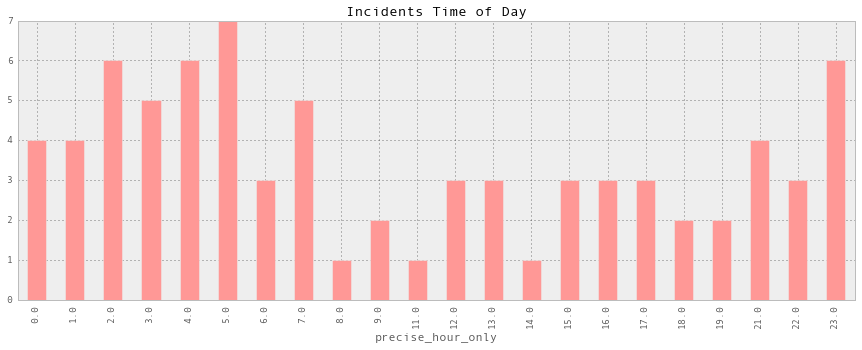

In [18]:
e1.groupby('precise_hour_only').size().plot(kind='bar', title='Incidents Time of Day', 
                                           color = tableau20[7])

#What types of vehicles are normally reported involved in incidents?

###Vehicle combinations
Most news reports cover incidents involving buses, and trucks, followed by these two vehicles combined with motorcycles.

In [19]:
multiple_vehicle_events = events[events.number_of_vehicles >= 2]
print multiple_vehicle_events['vehicle_types'].value_counts()[:10]
#events['vehicle_types'].value_counts()[:10].plot(kind='barh', color=tableau20)

motorcycle, truck    16
truck                13
motorcycle, bus      12
truck, bus           11
bus                  11
van, truck            6
motorcycle, car       4
car, truck            4
car                   4
motorcycle            4
dtype: int64


###Dangerous vehicles
Here's a more granular breakdown of vehicle types involved in incidents.

In [20]:
def clean_list(topics):
    clean_list = []
    for topic in topics:
        clean_list.extend(topic.split(','))
    return clean_list

In [21]:
def clean_vehicle_type(models):
    clean_list = []
    for model in models:
        if "suv" in model:
            clean_list.append("suv")
        elif "pajero" in model:
            clean_list.append("suv")
        elif "sports utility vehicle" in model:
            clean_list.append("suv")
        elif "jeep" in model:
            clean_list.append("jeepney")
        elif "train" in model:
            clean_list.append("train")
        elif "bus" in model:
            clean_list.append("bus")
        elif "truck" in model:
            clean_list.append("truck")
        elif "uv express van 'motorcycle" in model:
            clean_list.append('motorcycle')
            clean_list.append('uv express van')
        elif "car" in model:
            clean_list.append("car")
        elif "asian utility vehicle" in model:
            clean_list.append("AUV")
        elif "auv" in model:
            clean_list.append("auv")
        elif "multicab" in model:
            clean_list.append("multicab")
        elif "van" in model:
            clean_list.append("van")
        elif "motor" in model:
            clean_list.append("motorcycle")
        elif "va'" in model:
            clean_list.append("van")
        else:
            clean_list.append(model)
    return clean_list

truck                           142
bus                              81
motorcycle                       72
car                              49
van                              35
jeepney                          33
suv                              25
tricycle                         16
taxi                             15
AUV                               7
bicycle                           6
train                             3
auv                               2
school service                    1
unclear large parked vehicle      1
cement mixer                      1
not specified                     1
gas tanker                        1
multicab                          1
puv                               1
dtype: int64


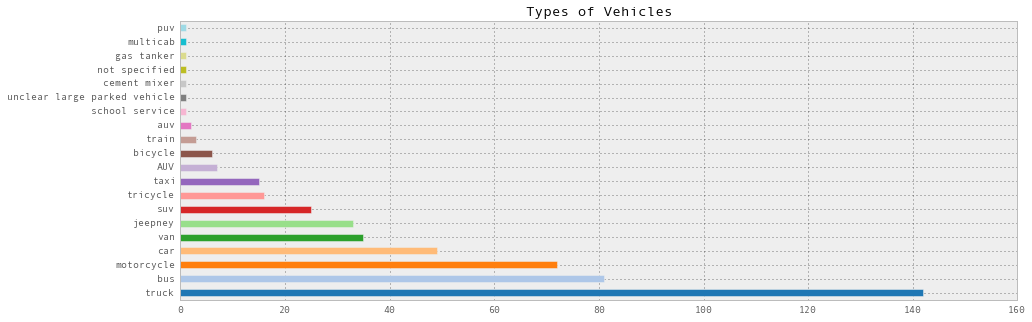

In [22]:
vehicle_types = clean_list(events.vehicle_types.dropna())
vehicle_types = [x.strip().lower() for x in vehicle_types]
vehicle_types = pd.Series(clean_vehicle_type(vehicle_types))
print vehicle_types.value_counts()
vehicle_types.value_counts().plot(kind='barh', color=tableau20, 
                                title="Types of Vehicles")

In [23]:
events['truck'] = events.vehicle_types.str.extract('(truck)')
events['motorcycle'] = events.vehicle_types.str.extract('(motorcycle)')
events['bus'] = events.vehicle_types.str.extract('(bus)')
events['car'] = events.vehicle_types.str.extract('(car)')
events['taxi'] = events.vehicle_types.str.extract('(taxi)')
events['van'] = events.vehicle_types.str.extract('(van)')
events['SUV'] = events.vehicle_types.str.extract('(SUV)')
events['tricycle'] = events.vehicle_types.str.extract('(tricycle)')
events['AUV'] = events.vehicle_types.str.extract('(AUV)')
events['jeepney'] = events.vehicle_types.str.extract('(jeep)')
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, Bus hits delivery truck on SLEx, 2 hurt | Inquirer News to #dumptruckguagua
Data columns (total 21 columns):
associated_articles    299 non-null object
coverage_frequency     299 non-null int64
incident_date          299 non-null datetime64[ns]
injured_number         193 non-null float64
injured_specific       177 non-null object
killed_number          133 non-null float64
killed_specific        119 non-null object
location               276 non-null object
number_of_vehicles     276 non-null float64
time                   190 non-null object
vehicle_types          278 non-null object
truck                  134 non-null object
motorcycle             71 non-null object
bus                    78 non-null object
car                    51 non-null object
taxi                   14 non-null object
van                    30 non-null object
SUV                    21 non-null object
tricycle               17 non-null object
AUV          

#How many vehicles are involved in most incidents?

###Most incidents only involve two vehicles, but surprisingly, there are almost as many incidents involving just one vehicle.

2     123
1      96
3      24
4      11
6       6
8       5
7       3
5       3
20      1
18      1
12      1
11      1
9       1
dtype: int64


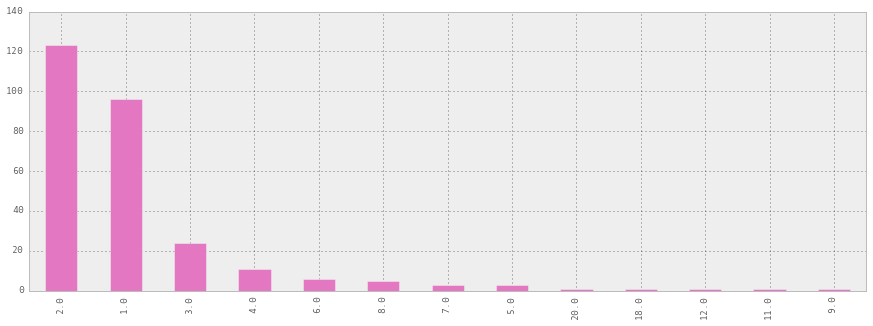

In [24]:
v_counts = events.number_of_vehicles.value_counts(sort=True)
print v_counts
v_counts.plot(kind='bar', color=tableau20[12])

#Victims
How many people are usually reported killed or injured in reported incidents?

###Fatalities
Most incidents only have one fatality.

1     72
2     21
3     10
4      9
5      6
6      2
7      2
13     1
15     1
21     1
dtype: int64


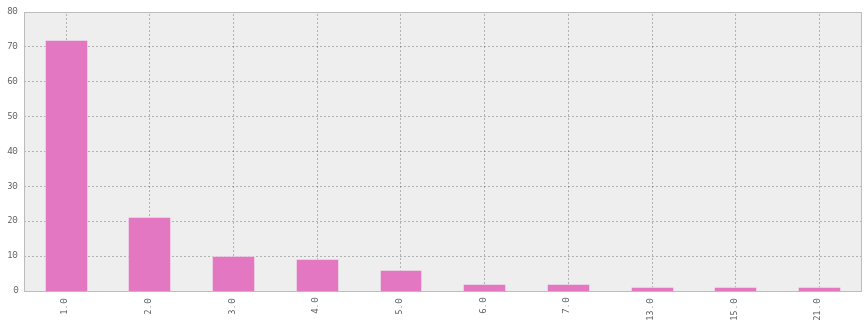

In [25]:
fatalities = events.killed_number.value_counts(sort=False)[1:]
print fatalities
fatalities.plot(kind='bar', color=tableau20[12])

In [26]:
len(events[events.killed_number>0])

125

###Injured
There's a wider range of numbers of people injured in reported incidents. Most incidents still report fewer than 10 people injured, 

In [27]:
len(events[events.injured_number > 0])

192

In [28]:
events.injured_number.dropna().sum()

1545.0

In [29]:
events.killed_number.dropna().sum()

285.0

0      1
1     41
2     34
3     14
4     21
5      7
6      8
7      4
8      1
9      7
10     4
11     2
12     3
13     4
14     5
15     6
16     5
17     3
18     2
21     2
22     2
23     1
24     4
28     1
29     1
30     2
31     1
32     1
38     1
40     1
45     1
46     1
47     1
50     1
dtype: int64


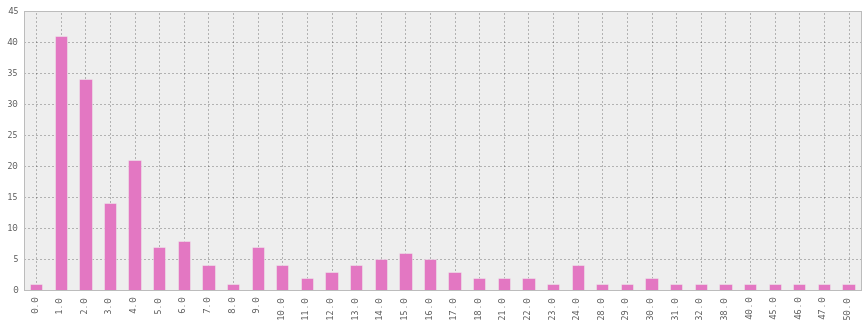

In [30]:
injured = events.injured_number.value_counts(sort=False)
print injured
injured.plot(kind='bar', color=tableau20[12])

In [31]:
events.groupby(pd.cut(events.injured_number, range(0, 55, 5))).size()

injured_number
(0, 5]            117
(5, 10]            24
(10, 15]           20
(15, 20]           10
(20, 25]            9
(25, 30]            4
(30, 35]            2
(35, 40]            2
(40, 45]            1
(45, 50]            3
dtype: int64

193
injured_number
(0, 5]            117
(5, 10]            24
(10, 15]           20
(15, 20]           10
(20, 25]            9
(25, 30]            4
(30, 35]            2
(35, 40]            2
(40, 45]            1
(45, 50]            3
dtype: int64


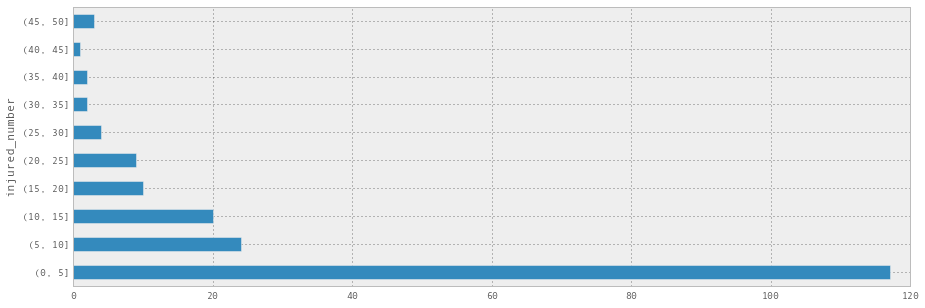

In [32]:
print events.injured_number.dropna().count()
print events.groupby(pd.cut(events.injured_number, range(0, 55, 5))).size()
events.groupby(pd.cut(events.injured_number, range(0, 55, 5))).size().plot(kind='barh')

#How frequently are individual events covered?

While most events only get reported in the media once, some events get covered multiple times.

##248 out of 299 events were reported only once. 

coverage_frequency
1                     248
2                      31
3                      10
4                       3
5                       1
6                       1
10                      1
12                      2
31                      1
61                      1
dtype: int64


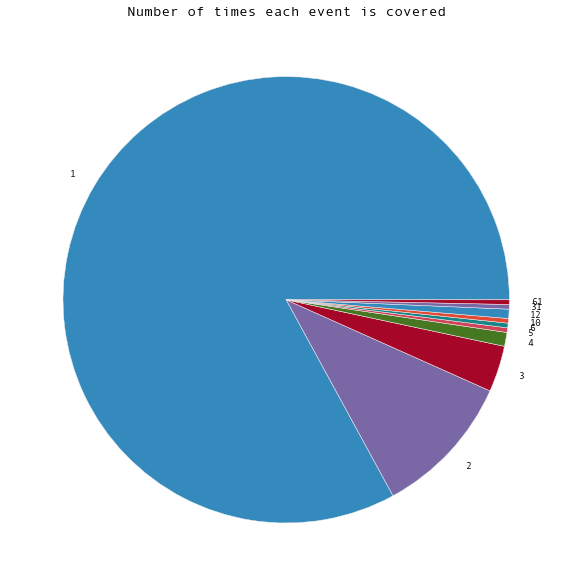

In [33]:
events.groupby('coverage_frequency').size().plot(kind='pie', title='Number of times each event is covered',figsize=(10,10))
print events.groupby('coverage_frequency').size()

#51 events were reported multiple times.

...31 events were reported twice<br>
...18 events were reported 3 to 19 times<br>
...1 event reported more than 30 times<br>
...1 event reported over 60 times!<br>

Most reported event - Bontoc Bus tragedy with over 60 reports.

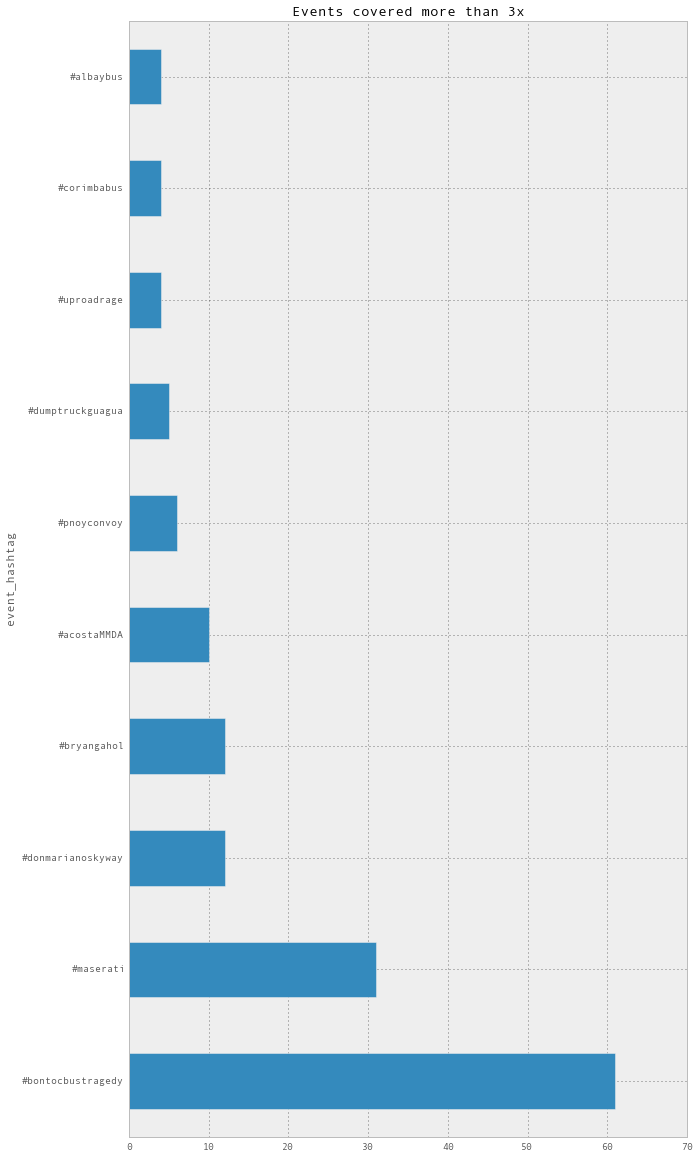

In [34]:
covered_multiple = events[events.coverage_frequency >= 3]
covered_multiple = covered_multiple.sort(['coverage_frequency'],ascending=False)[:10]
covered_multiple.coverage_frequency.plot(kind='barh',title="Events covered more than 3x",figsize=(10,20))

In [35]:
covered_multiple.head()

,associated_articles,coverage_frequency,incident_date,injured_number,injured_specific,killed_number,killed_specific,location,number_of_vehicles,time,...,truck,motorcycle,bus,car,taxi,van,SUV,tricycle,AUV,jeepney
event_hashtag,,,,,,,,,,,,,,,,,,,,,
#bontocbustragedy,"[1050.0, 2526.0, 711.0, 264.0, 614.0, 102.0, 1...",61,2014-02-07,32,name: Edgar Renon; gender: male; profession: b...,15,name: Arvin Tado Jimenez; ridergroup: gender: ...,"Mt Province, Bontoc Benguet, Bontoc, Barangay ...",1,"set(7:00 AM, Morning)",...,NaN,NaN,bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#maserati,"[1608.0, 101.0, 380.0, 2574.0, 1079.0, 133.0, ...",31,2014-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#donmarianoskyway,"[1356.0, 2.0, 872.0, 1061.0, 528.0, 2306.0, 36...",12,2014-01-07,24,ridergroup: passenger * 24/,21,ridergroup: driver; /\nridergroup: passenger; ...,"NCR, Skyway",1,NaN,...,NaN,NaN,bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#bryangahol,"[1145.0, 81.0, 901.0, 581.0, 2689.0, 2690.0, 2...",12,2014-04-01,3,name: Johnny Bangsoy; gender: male; ridergroup...,2,'name: Bryan Gahol; gender: male; profession: ...,"SLEX NCR, Muntinlupa City, SLEX, Barangay Cupa...",4,"set(Early Morning, 10:00 PM, Night)",...,truck,NaN,NaN,car,NaN,van,NaN,NaN,NaN,jeep
#acostaMMDA,"[1735.0, 1600.0, 2396.0, 1976.0, 1034.0, 86.0,...",10,2014-12-19,1,name: Roger Borres; age: 28; gender: male; pro...,1,name: Sonny Acosta; ridergroup: traffic enforc...,"Quezon City, Cubao NCR, Quezon City, EDSA Cubao",2,"set(8:00 AM, 6:35 PM, Morning)",...,NaN,motorcycle,bus,NaN,NaN,NaN,SUV,NaN,NaN,NaN


#Event Locations

In [36]:
events.location = events.location.str.split(',')
events.location = events.location.str.replace("\['","")
events.location = events.location.str.replace("\]'","")


In [37]:
incident_locations = events.location.dropna()

def provinces(incident_locations):
    provinces = []
    for x in incident_locations:
        provinces.append(x[0])
    return provinces

provinces = provinces(incident_locations)

In [38]:
def get_regions(provinces):
    rp = []
    metro_manila = ["NCR","Quezon City","Mandaluyong","Mandaluyong City","Pasig","Pasig City","Makati",
                    "Makati City","Pasay","Pasay City","Muntinlupa","Manila","Marikina", "Marikina City",
                    "Taguig","Taguig City","San Juan","Metro Manlia","Metro Manila"]
    calabarzon = ["Batangas","Cavite","Laguna","Lucena","Quezon","Rizal"]
    central_luzon = ["Angeles", "Aurora", "Bataan", "Bulacan", "Nueva Ecija","Olongapo","Pampanga",
                     "Tarlac","Zambales"]
    western_visayas = ['Aklan', 'Antique', 'Capiz', 'Guimaras', 'Iloilo', 'Iloilo City']
    cordillera = ["Mt Province","Mountain Province","Abra","Benguet","Ifugao"]
    ilocos = ["Dagupan","Ilocos Norte","Ilocos Sur","La Union","Pangasinan"]
    bicol = ["Albay","Camarines Norte","Camarines Sur","Catanduanes","Masbate","Naga","Sorsogon"]
    northern_mindanao=['Bukidnon', 'Cagayan de Oro', "Cagayan de Oro City",'Camiguin', 'Iligan', 'Lanao del Norte',
                       'Misamis Occidental', 'Misamis Oriental']
    cagayan = ['Batanes', 'Cagayan', 'Isabela', 'Nueva Vizcaya', 'Tuguegarao City','Quirino', 'Santiago']
    negros = ['Bacolod', 'Bacolod City', 'Negros Occidental', 'Negros Oriental']
    for province in provinces:
        if province in metro_manila:
            rp.append("Metro Manila")
        elif "EDSA" in province:
            rp.append("Metro Manila")
        elif "Davao" in province:
            rp.append("Davao Region")
        elif province in cordillera:
            rp.append("Cordillera")
        elif "Cebu" in province:
            rp.append("Central Visayas")
        elif province in calabarzon:
            rp.append("CALABARZON")
        elif province in central_luzon:
            rp.append("Central Luzon")
        elif province in western_visayas:
            rp.append("Western Visayas")
        elif province in ilocos:
            rp.append("Ilocos")
        elif province in bicol:
            rp.append("Bicol")
        elif province in northern_mindanao:
            rp.append("Northern Mindanao")
        elif province in cagayan:
            rp.append("Cagayan Valley")
        elif province in negros:
            rp.append("Negros Island")
        elif "SLEX" in province:
            rp.append("CALABARZON")
        elif "South Luzon Expressway" in province:
            rp.append("CALABARZON")
        elif "Camachile Loading Bay" in province:
            rp.append("Metro Manila")
        elif "North Luzon Expressway" in province:
            rp.append("Central Luzon")
        else:
            rp.append(province)
    return rp

regions = get_regions(provinces)
region_counts = pd.Series([x.strip() for x in regions])
region_counts.value_counts(normalize=True)
#region_counts.value_counts().plot(kind='barh', color=tableau20, 
#                                title="Incident Locations by Region")

Series([], dtype: float64)

#Do events with more victims get more coverage?

###In a way, yes.

The two events with most fatalities were also the two most covered. That's the **Bontoc Bus Tragedy** and the **Don Mariano Skyway crash.**

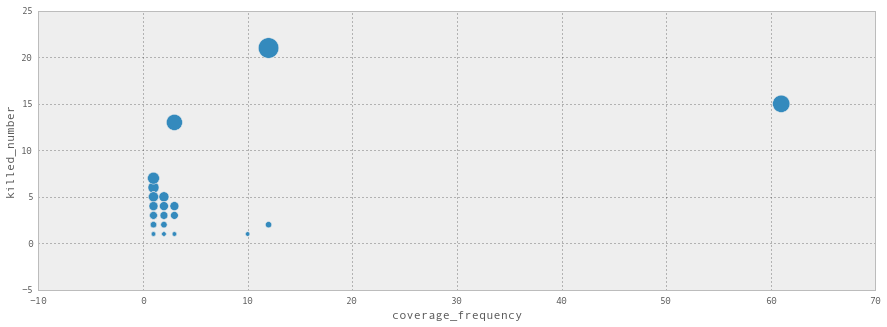

In [39]:
events.plot(kind='scatter', x='coverage_frequency', y='killed_number', s=events['killed_number']*20)

##What high-fatality crashes didn't get covered?

###But the 3rd most fatal event only got covered 3 times.

That's the **Buguias bus crash** which killed 13 to 16 high school students in Benguet in September 2014.

In [40]:
events[events.killed_number >= 10][events.coverage_frequency <= 4]

/Users/piafaustino/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1808: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,associated_articles,coverage_frequency,incident_date,injured_number,injured_specific,killed_number,killed_specific,location,number_of_vehicles,time,...,truck,motorcycle,bus,car,taxi,van,SUV,tricycle,AUV,jeepney
event_hashtag,,,,,,,,,,,,,,,,,,,,,
#buguiascrash,"[1315.0, 2056.0, 431.0]",3,2014-09-09,4,name: Reyshan Latuwed; age: 18; gender: female...,13,name: Efren Dalisdis; age: 45; gender: male; r...,NaN,1,set(4:30 PM),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jeep


###Meanwhile, there were 19 events with 4 to 10 victims.

Average number of times these were covered? **1.21 times**

In [41]:
numcov = pd.Series(events.loc[(events["killed_number"] >=4) & (events["killed_number"] <= 10)]['coverage_frequency'])
print numcov.count()
numcov.mean()

19


1.2105263157894737

###Surprisingly, stories with fewer than 4 victims got slightly more coverage on average than stories with more victims.

Average number of articles per event? 1.39. Thanks to high profile road rage stories like **#Maserati** and **#AcostaMMDA.**

In [42]:
numcovless = pd.Series(events[events.killed_number < 4]['coverage_frequency'])
print numcovless.count()
numcovless.mean()

111


1.3873873873873874

#How about events with more injured victims? Do they get more coverage?

###Again, there are outliers.

With over 30 injured persons, **Bontoc Bus Tragedy** was also most covered.

###But there were 9 other events with even more casualties.

Despite the fact that these 9 events injured more than 39 persons on average, they were covered an average of 1 to 2 times each.

In [43]:
over_30_injured = events[events.injured_number >= 30][events.coverage_frequency < 60]
over_30_injured

,associated_articles,coverage_frequency,incident_date,injured_number,injured_specific,killed_number,killed_specific,location,number_of_vehicles,time,...,truck,motorcycle,bus,car,taxi,van,SUV,tricycle,AUV,jeepney
event_hashtag,,,,,,,,,,,,,,,,,,,,,
31 elite cops hurt in Sarangani road accident police official | News | GMA News Online,2494,1,2014-03-15,31,profession: PNP Special Action Forces member; ...,NaN,NaN,NaN,1,2015-07-09 02:50:00,...,truck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50 injured in bus accident on Commonwealth Avenue | Inquirer News,365,1,2014-03-22,50,name: Anthony Malangan; age: 58; gender: male;...,NaN,NaN,NaN,3,2015-07-09 05:55:00,...,NaN,NaN,bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bus in deadly Albay accident a colorum coffin on wheels? | News | GMA News Online,758,1,2014-10-06,30,NaN,4,profession: teacher; age: 26; /,NaN,2,NaN,...,NaN,NaN,bus,NaN,NaN,NaN,NaN,tricycle,NaN,NaN
#elenalinerbuscrash,[1549.0],1,2014-03-07,38,NaN,7,NaN,NaN,1,NaN,...,NaN,NaN,bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#matalamcrash,[741.0],1,2014-03-19,30,ridergroup: passenger * 30/,5,name: Jobaida Abdulhawab; age: 50; ridergroup:...,NaN,2,NaN,...,truck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jeep
#40hurtonSLEX,"[197.0, 1017.0]",2,2014-03-24,45,name: Edgar Lagrimas; gender: male; ridergroup...,NaN,NaN,NaN,1,"set(6:20 AM, Morning)",...,NaN,NaN,bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#47hurtBatangas,"[2036.0, 1188.0]",2,2014-10-31,47,ridergroup: bus passenger; * 46 /\nname: Loren...,2,name: Arniel Diaz; profession: bus conductor; ...,NaN,2,2015-07-09 23:00:00,...,truck,NaN,bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#victoryolongapo,"[2711.0, 2712.0]",2,2014-04-22,40,ridergroup: bus passenger; name: Peter Yabut; ...,1,ridergroup: bystander; name: Guadalupe Walters; /,NaN,1,NaN,...,NaN,NaN,bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#jambusbatangas,"[2714.0, 2715.0, 2716.0]",3,2014-05-04,46,ridergroup: bus passengers; *46 /,1,ridergroup: bus passenger; gender: female; age...,NaN,2,NaN,...,NaN,NaN,bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
print over_30_injured.injured_number.mean()
print over_30_injured.coverage_frequency.mean()

39.6666666667
1.55555555556


#Extracting quantitative victim data

In [45]:
fatal_crashes = events.killed_number.dropna()
fatal_crashes.index[3]

'1 dead, 7 hurt in CamSur road accident | Inquirer News'

In [46]:
def extract_killed():
    victims = []
    counter = 0
    for x in fatal_crashes:
        num_killed = fatal_crashes[counter]
        event_name = fatal_crashes.index[counter]
        while num_killed != 0:
            fatality = {'event':event_name, 'killed':1}
            victims.append(fatality)
            num_killed = num_killed - 1
        counter = counter + 1
    return victims

In [47]:
injurious_crashes = events.injured_number.dropna()
print injurious_crashes[3]
print injurious_crashes.index[3]

7.0
1 dead, 7 hurt in CamSur road accident | Inquirer News


In [48]:
def extract_injured():
    victims = []
    counter = 0
    for x in injurious_crashes:
        num_injured = injurious_crashes[counter]
        event_name = injurious_crashes.index[counter]
        while num_injured != 0:
            injured = {'event':event_name, 'injured':1}
            victims.append(injured)
            num_injured = num_injured - 1
        counter = counter + 1
    return victims
    

In [49]:
victims = extract_killed() + extract_injured()
victims = pd.DataFrame(victims)

In [50]:
victims['gender']= ""
victims['age'] = ""
victims['ridergroup'] = "passenger"
victims.head()

,event,injured,killed,gender,age,ridergroup
0,Motorcycle rider dies in EDSA mishap,NaN,1,,,passenger
1,2 killed in Pangasinan road accident | Inquire...,NaN,1,,,passenger
2,2 killed in Pangasinan road accident | Inquire...,NaN,1,,,passenger
3,"Customs officer killed, 2 hurt in QC road mishap",NaN,1,,,passenger
4,"1 dead, 7 hurt in CamSur road accident | Inqui...",NaN,1,,,passenger


#Extracting qualitative data about the victims

In [51]:
injured_specific = events.injured_specific.dropna().str.replace('\n','')
injured_specific = events.injured_specific.dropna().str.split('/')

In [52]:
injured_specific.head()

event_hashtag
Bus hits delivery truck on SLEx, 2 hurt | Inquirer News    [ridergroup: truck driver ,  ridergroup: truck...
Customs officer killed, 2 hurt in QC road mishap           [ridergroup: taxi driver ,  ridergroup: passen...
1 dead, 7 hurt in CamSur road accident | Inquirer News     [name: Leonida Carigutan; gender: female; ride...
16 hurt in bus-jeep collision in QC                                           [ridergroup: passenger * 16, ]
Man killed in Pasig motorcycle crash                       [name: Reuben George Robles; ridergroup: car d...
Name: injured_specific, dtype: object

In [53]:
print injured_specific.index[2]
print injured_specific[2]

1 dead, 7 hurt in CamSur road accident | Inquirer News
['name: Leonida Carigutan; gender: female; ridergroup: bus passenger; ', '\nname: Ivy Marie Angog; gender: female; ridergroup: bus passenger; ', '\nname: Nieves Caceres; gender: male; ridergroup: bus passenger; ', '\nname: Melanie Arizgado; gender: female; ridergroup: bus passenger; ', '\nname: Visitacion Dagome; gender: female; ridergroup: bus passenger; ', '\nname: Catherine Resus; gender: female; ridergroup: bus passenger; ', '\nname: Lanie Casugao; gender: female; ridergroup: bus passenger; ', '']


In [54]:
def extract_injured_specific():
    victim_descriptions = []
    counter = 0
    for x in injured_specific:
        event_name = injured_specific.index[counter]
        victim_list = injured_specific[counter]
        for y in victim_list:
            victim_info = {'event':event_name, 'injured_desc':y}
            victim_descriptions.append(victim_info)
        counter = counter + 1
    return victim_descriptions

injured_specific_full = pd.DataFrame(extract_injured_specific())

In [55]:
injured_specific_full = injured_specific_full.dropna()
injured_specific_full = injured_specific_full[injured_specific_full.injured_desc.str.len() > 4]
injured_specific_full['number'] = NaN
injured_specific_full.number = injured_specific_full.injured_desc.str.extract('[*][\s]*(\d+)')
injured_specific_full['number'].fillna(1, inplace=True)
injured_specific_full['number'] = injured_specific_full['number'].astype('int64')
injured_specific_full.head()

,event,injured_desc,number
0,"Bus hits delivery truck on SLEx, 2 hurt | Inqu...",ridergroup: truck driver,1
1,"Bus hits delivery truck on SLEx, 2 hurt | Inqu...",ridergroup: truck helper,1
3,"Customs officer killed, 2 hurt in QC road mishap",ridergroup: taxi driver,1
4,"Customs officer killed, 2 hurt in QC road mishap",ridergroup: passenger,1
6,"1 dead, 7 hurt in CamSur road accident | Inqui...",name: Leonida Carigutan; gender: female; rider...,1


In [56]:
injured_specific_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 755
Data columns (total 3 columns):
event           583 non-null object
injured_desc    583 non-null object
number          583 non-null int64
dtypes: int64(1), object(2)
memory usage: 18.2+ KB


In [57]:
#testing best way to extract data

print injured_specific_full.iloc[0]['number']
print injured_specific_full['event'][0]
print injured_specific_full['injured_desc'][0]
print injured_specific_full['number'][1]
print injured_specific_full['event'][1]
print injured_specific_full['injured_desc'][1]

1
Bus hits delivery truck on SLEx, 2 hurt | Inquirer News
ridergroup: truck driver 
1
Bus hits delivery truck on SLEx, 2 hurt | Inquirer News
 ridergroup: truck helper 


In [58]:
def get_victim_info(counter):
    event_name = injured_specific_full.iloc[counter]['event']
    victim_info = injured_specific_full.iloc[counter]['injured_desc']    
    victim = {'event':event_name,'victim_info':victim_info,'injured':1}
    return victim

def get_multiplier(counter):
    multiplier = injured_specific_full.iloc[counter]['number']
    return multiplier

print get_victim_info(0)
print get_multiplier(0)

{'injured': 1, 'victim_info': 'ridergroup: truck driver ', 'event': 'Bus hits delivery truck on SLEx, 2 hurt | Inquirer News'}
1


In [59]:
def multiply_injured():
    multiplied_injured = []
    counter = 0
    total = len(injured_specific_full)
    while counter < total:
        multiplier = get_multiplier(counter)
        if multiplier == 1:
            multiplied_injured.append(get_victim_info(counter))
        elif multiplier > 1:
            while multiplier > 1:
                multiplied_injured.append(get_victim_info(counter))
                multiplier = multiplier - 1
        counter = counter + 1
    return multiplied_injured

all_injured_qualitative = pd.DataFrame(multiply_injured())

In [60]:
all_injured_qualitative.victim_info = all_injured_qualitative.victim_info.str.replace('\n','')
all_injured_qualitative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1019
Data columns (total 3 columns):
event          1020 non-null object
injured        1020 non-null int64
victim_info    1020 non-null object
dtypes: int64(1), object(2)
memory usage: 31.9+ KB


In [61]:
killed_specific = events.killed_specific.dropna().str.replace('\n','')
killed_specific = events.killed_specific.dropna().str.split('/')
killed_specific.head()

event_hashtag
Motorcycle rider dies in EDSA mishap                      [name: Ryan Ragas; age: 29; profession: securi...
2 killed in Pangasinan road accident | Inquirer News      [name: Joseph Quiban; age: 32; gender: male; r...
Customs officer killed, 2 hurt in QC road mishap          [name: Alfonso Mallari; age: 73; gender: male;...
1 dead, 7 hurt in CamSur road accident | Inquirer News    [ridergroup: motorcycle driver; name: Verni Lo...
Man killed after being run over by bus in EDSA            [gender: male; ridergroup: bystander; age: adu...
Name: killed_specific, dtype: object

In [62]:
def extract_killed_specific():
    victim_descriptions = []
    counter = 0
    for x in killed_specific:
        event_name = killed_specific.index[counter]
        victim_list = killed_specific[counter]
        for y in victim_list:
            victim_info = {'event':event_name, 'killed_desc':y}
            victim_descriptions.append(victim_info)
        counter = counter + 1
    return victim_descriptions

killed_specific_full = pd.DataFrame(extract_killed_specific())

In [63]:
killed_specific_full.head()

,event,killed_desc
0,Motorcycle rider dies in EDSA mishap,name: Ryan Ragas; age: 29; profession: securit...
1,Motorcycle rider dies in EDSA mishap,
2,2 killed in Pangasinan road accident | Inquire...,name: Joseph Quiban; age: 32; gender: male; ri...
3,2 killed in Pangasinan road accident | Inquire...,\nname: Lyndon Ordanez; age: 18; gender: male;...
4,2 killed in Pangasinan road accident | Inquire...,


In [64]:
killed_specific_full = killed_specific_full.dropna()
killed_specific_full = killed_specific_full[killed_specific_full.killed_desc.str.len() > 4]
killed_specific_full['number'] = NaN
killed_specific_full.number = killed_specific_full.killed_desc.str.extract('[*][\s]*(\d+)')
killed_specific_full['number'].fillna(1, inplace=True)
killed_specific_full['number'] = killed_specific_full['number'].astype('int64')
killed_specific_full.head()

,event,killed_desc,number
0,Motorcycle rider dies in EDSA mishap,name: Ryan Ragas; age: 29; profession: securit...,1
2,2 killed in Pangasinan road accident | Inquire...,name: Joseph Quiban; age: 32; gender: male; ri...,1
3,2 killed in Pangasinan road accident | Inquire...,\nname: Lyndon Ordanez; age: 18; gender: male;...,1
5,"Customs officer killed, 2 hurt in QC road mishap",name: Alfonso Mallari; age: 73; gender: male; ...,1
7,"1 dead, 7 hurt in CamSur road accident | Inqui...",ridergroup: motorcycle driver; name: Verni Loc...,1


In [65]:
def get_victim_info_killed(counter):
    event_name = killed_specific_full.iloc[counter]['event']
    victim_info = killed_specific_full.iloc[counter]['killed_desc']    
    victim = {'event':event_name,'victim_info':victim_info,'killed':1}
    return victim

def get_multiplier_killed(counter):
    multiplier = killed_specific_full.iloc[counter]['number']
    return multiplier

print get_victim_info(0)
print get_multiplier(0)

{'injured': 1, 'victim_info': 'ridergroup: truck driver ', 'event': 'Bus hits delivery truck on SLEx, 2 hurt | Inquirer News'}
1


In [66]:
def multiply_killed():
    multiplied_killed = []
    counter = 0
    total = len(killed_specific_full)
    while counter < total:
        multiplier = get_multiplier_killed(counter)
        if multiplier == 1:
            multiplied_killed.append(get_victim_info_killed(counter))
        elif multiplier > 1:
            while multiplier > 1:
                multiplied_killed.append(get_victim_info_killed(counter))
                multiplier = multiplier - 1
        counter = counter + 1
    return multiplied_killed

all_killed_qualitative = pd.DataFrame(multiply_killed())

In [67]:
all_killed_qualitative['killed'] = all_killed_qualitative['killed'].astype('int64')
all_killed_qualitative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 3 columns):
event          260 non-null object
killed         260 non-null int64
victim_info    260 non-null object
dtypes: int64(1), object(2)
memory usage: 8.1+ KB


In [68]:
all_victims = pd.merge(all_killed_qualitative,all_injured_qualitative,how="outer")
all_victims.head()

,event,killed,victim_info,injured
0,Motorcycle rider dies in EDSA mishap,1,name: Ryan Ragas; age: 29; profession: securit...,NaN
1,2 killed in Pangasinan road accident | Inquire...,1,name: Joseph Quiban; age: 32; gender: male; ri...,NaN
2,2 killed in Pangasinan road accident | Inquire...,1,\nname: Lyndon Ordanez; age: 18; gender: male;...,NaN
3,"Customs officer killed, 2 hurt in QC road mishap",1,name: Alfonso Mallari; age: 73; gender: male; ...,NaN
4,"1 dead, 7 hurt in CamSur road accident | Inqui...",1,ridergroup: motorcycle driver; name: Verni Loc...,NaN


In [69]:
#import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

all_victims.victim_info = all_victims.victim_info.str.replace("set\(\[\'","")
all_victims.victim_info = all_victims.victim_info.str.replace("\\n","")
all_victims.victim_info = all_victims.victim_info.str.replace(', ',"")
all_victims.victim_info = all_victims.victim_info.str.replace('([*][\s]*(\d+))',"")
all_victims.victim_info = all_victims.victim_info.str.replace("''","")
all_victims['ridergroup'] = all_victims.victim_info.str.extract('ridergroup:(.+?);')
all_victims['name'] = all_victims.victim_info.str.extract('name:(.+?);')
all_victims['age'] = all_victims.victim_info.str.extract('age:(.+?);')
all_victims['gender'] = all_victims.victim_info.str.extract('gender:(.+?);')
all_victims['profession'] = all_victims.victim_info.str.extract('profession:(.+?);')
all_victims['condition'] = all_victims.victim_info.str.extract('condition:(.+?);')
all_victims.head()

,event,killed,victim_info,injured,ridergroup,name,age,gender,profession,condition
0,Motorcycle rider dies in EDSA mishap,1,name: Ryan Ragas; age: 29; profession: securit...,NaN,motorcycle driver,Ryan Ragas,29,NaN,security guard,NaN
1,2 killed in Pangasinan road accident | Inquire...,1,name: Joseph Quiban; age: 32; gender: male; ri...,NaN,motorcycle driver,Joseph Quiban,32,male,NaN,NaN
2,2 killed in Pangasinan road accident | Inquire...,1,name: Lyndon Ordanez; age: 18; gender: male; r...,NaN,motorcycle driver,Lyndon Ordanez,18,male,NaN,NaN
3,"Customs officer killed, 2 hurt in QC road mishap",1,name: Alfonso Mallari; age: 73; gender: male; ...,NaN,driver,Alfonso Mallari,73,male,Bureau of Customs Officer,NaN
4,"1 dead, 7 hurt in CamSur road accident | Inqui...",1,ridergroup: motorcycle driver; name: Verni Loc...,NaN,motorcycle driver,Verni Locete,NaN,NaN,NaN,dead on spot


In [70]:
all_victims.to_csv("victims_clean.csv",index_label="event")